In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd

In [542]:
pd.set_option('display.max_rows', 1100)
pd.set_option('display.max_columns', 100)

In [58]:
data = pd.read_csv('puzzle.csv',names=['a','b'])

In [32]:
data.head(20)

,a,b
0,0.397150,2.113629
1,0.397150,2.113629
2,0.397150,2.113629
3,0.397150,2.113629
4,0.397150,2.113629
5,0.397150,2.113629
6,0.397150,2.113629
7,0.397150,2.113629
8,0.967562,-0.099246
9,0.061841,-1.333110


In [33]:
data.isnull().sum()

a    0
b    0
dtype: int64

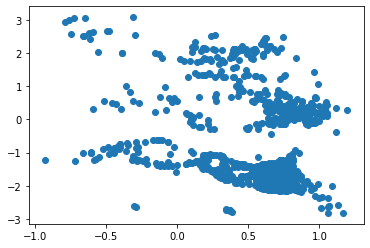

In [34]:
plt.scatter(data.a,data.b)

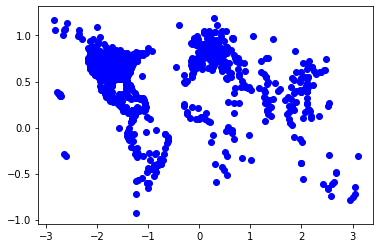

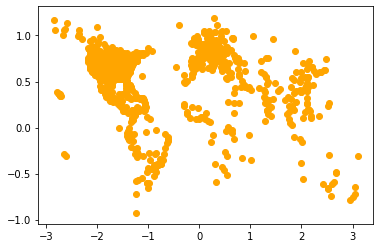

In [35]:
plt.scatter(data.b,data.a, c = 'blue')
plt.show()
plt.scatter(data.drop_duplicates().b,data.drop_duplicates().a, c='orange')

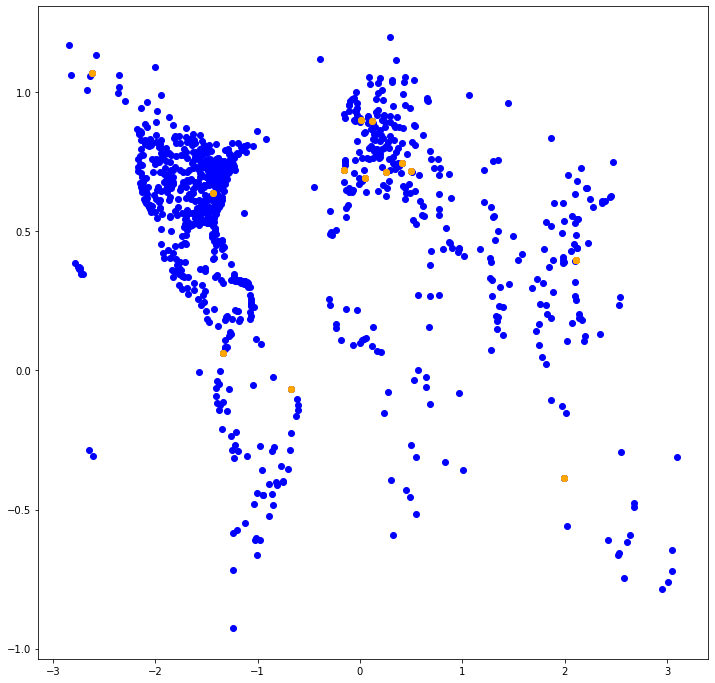

In [36]:
plt.figure(figsize=(12,12))
plt.scatter(data.b,data.a, c = 'blue')
plt.scatter(data[data.duplicated(keep=False)].b, data[data.duplicated(keep=False)].a, c='orange')

In [37]:
print(data.a.max())
print(data.a.min())
print(data.b.max())
print(data.b.min())

1.1953987
-0.9250699
3.0969645
-2.8378879


Probably Radians

In [38]:
data.head(1)

,a,b
0,0.39715,2.113629


In [59]:
data['lat'] = data.a*(180/np.pi)
data['long'] = data.b*(180/np.pi)

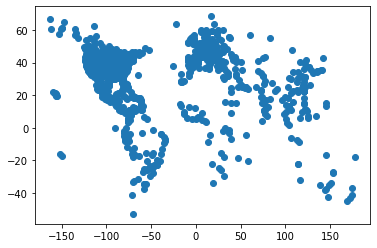

In [40]:
plt.scatter(data['long'], data['lat'])

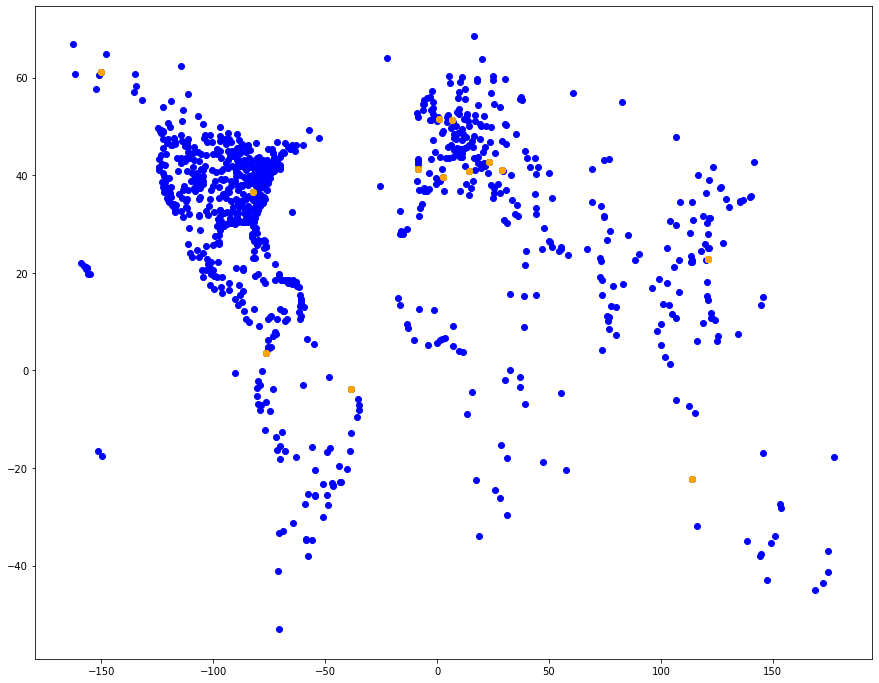

In [41]:
plt.figure(figsize=(15,12))
plt.scatter(data.long,data.lat, c = 'blue')
plt.scatter(data[data.duplicated(keep=False)].long, data[data.duplicated(keep=False)].lat, c='orange')

In [60]:
dup_data_for_geo = data[data.duplicated(keep=False)].copy()

In [61]:
data['geometry'] = data.apply(lambda row: Point(row.long, row.lat), axis=1)

In [62]:
dup_data_for_geo['geometry'] = dup_data_for_geo.apply(lambda row: Point(row.long, row.lat), axis=1)

In [63]:
dup_data_for_geo = dup_data_for_geo[['lat','long','geometry']]

In [64]:
data_for_geo = data[['lat','long','geometry']]

In [66]:
geo_data = gpd.GeoDataFrame(data_for_geo)

In [67]:
dup_geo_data = gpd.GeoDataFrame(dup_data_for_geo)

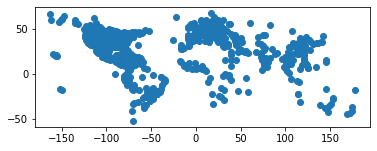

In [68]:
geo_data.plot()

In [69]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<Figure size 432x288 with 0 Axes>

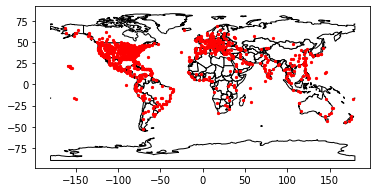

In [70]:
plt.figure()
base = world.plot(color='white', edgecolor='black')
geo_data.plot(ax=base, marker='o', color='red', markersize=5);

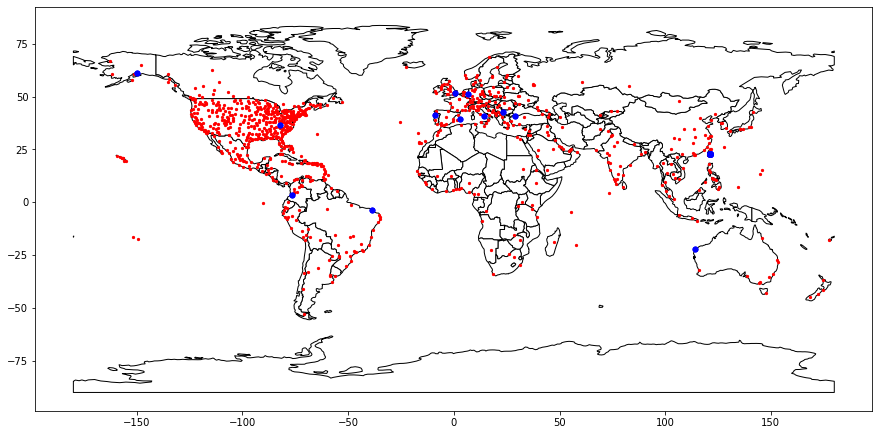

In [73]:
fig, ax = plt.subplots(figsize=(15,12))
ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
geo_data.plot(ax=ax, marker='o', color='red', markersize=5)
dup_geo_data.plot(ax=ax, marker='o', color='blue', markersize=25)
plt.show()

Download a data set of lots of airports

In [390]:
other_airports = pd.read_csv('https://ourairports.com/data/airports.csv')

In [391]:
other_airports.head(1)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN


In [392]:
len(other_airports)

55472

In [393]:
other_airports = other_airports.drop_duplicates(subset=['latitude_deg','longitude_deg'])

In [394]:
len(other_airports)

55341

In [395]:
other_airports.groupby('type').count()

,id,ident,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
type,,,,,,,,,,,,,,,,,
balloonport,23,23,23,23,23,20,5,23,23,23,23,18,0,20,4,0,0
closed,3721,3721,3721,3721,3721,2758,1553,3717,3721,3098,3721,732,255,503,58,639,1873
heliport,11307,11307,11307,11307,11307,9628,4245,11307,11307,10933,11307,8563,64,7695,94,215,1979
large_airport,614,614,614,614,614,608,408,613,614,606,614,606,604,203,360,611,293
medium_airport,4535,4535,4535,4535,4535,4338,3293,4524,4535,4011,4535,4278,3859,971,783,3730,1197
seaplane_base,1016,1016,1016,1016,1016,828,60,1016,1016,793,1016,897,145,932,18,211,158
small_airport,34125,34125,34125,34125,34125,30226,17915,33894,34125,30155,34125,25995,4255,18627,1693,4489,3927


In [396]:
len(other_airports)

55341

In [397]:
len(large_airports)

613

In [398]:
large_airports = other_airports[(other_airports.type == 'large_airport')]

In [399]:
large_airports.head(1)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
11813,67,AYPY,large_airport,Port Moresby Jacksons International Airport,-9.44338,147.220001,146.0,OC,PG,PG-NCD,Port Moresby,yes,AYPY,POM,NaN,NaN,http://en.wikipedia.org/wiki/Jacksons_Internat...,NaN


In [400]:
large_airports = large_airports[['latitude_deg', 'longitude_deg']]

In [401]:
large_airports['geometry'] = large_airports.apply(lambda row: Point(row.longitude_deg, row.latitude_deg), axis=1)

In [402]:
la_geo = gpd.GeoDataFrame(large_airports)

In [403]:
la_geo.head()

,latitude_deg,longitude_deg,geometry
11813,-9.443380,147.220001,POINT (147.2200012207031 -9.443380355834961)
12277,63.985001,-22.605600,POINT (-22.605600357056 63.985000610352)
12324,42.572800,21.035801,POINT (21.035801 42.5728)
13713,53.310365,-110.072021,POINT (-110.072021 53.310365)
15265,36.001741,117.632010,POINT (117.63201 36.001741)


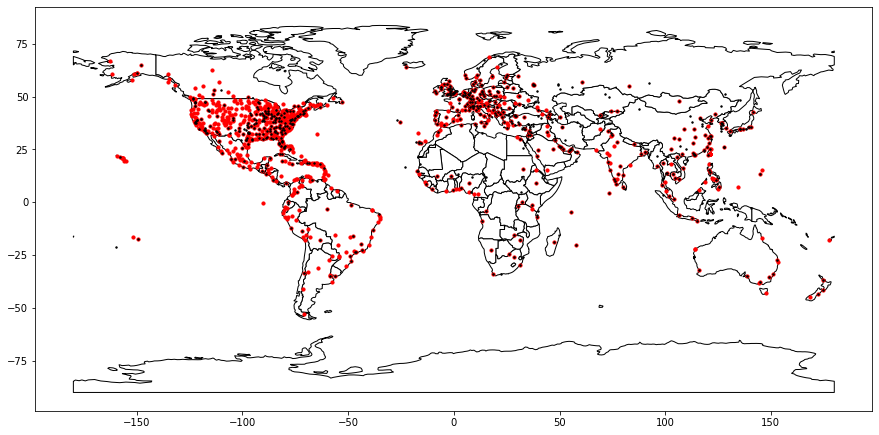

In [404]:
fig, ax = plt.subplots(figsize=(15,12))
ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
geo_data.plot(ax=ax, marker='o', color='red', markersize=10)
la_geo.plot(ax=ax, marker='o', color='black', markersize=2)
plt.show()

modify long and lat so it easier to merge df's

In [463]:
other_airports['lat'] = (np.round(other_airports['latitude_deg']*1e4)).apply(int)
other_airports['long'] = (np.round(other_airports['longitude_deg']*1e4)).apply(int)

In [464]:
data['lat_int'] = (np.round(data['lat']*1e4)).apply(int)
data['long_int'] = (np.round(data['long']*1e4)).apply(int)

In [466]:
data[['lat','long','lat_int','long_int']].head(3)

,lat,long,lat_int,long_int
0,22.755002,121.101998,227550,1211020
1,22.755002,121.101998,227550,1211020
2,22.755002,121.101998,227550,1211020


In [467]:
other_airports[['lat','long','latitude_deg','longitude_deg']].head(6)

,lat,long,latitude_deg,longitude_deg
0,400708,-749336,40.070801,-74.933601
1,387040,-1014739,38.704022,-101.473911
2,599492,-1516960,59.949200,-151.695999
3,348648,-867703,34.864799,-86.770302
4,356087,-912549,35.608700,-91.254898
5,349428,-978180,34.942803,-97.818019


In [468]:
other_airports.groupby('type').mean()

,id,latitude_deg,longitude_deg,elevation_ft,lat,long
type,,,,,,
balloonport,87872.521739,38.839965,-65.141598,1059.550000,388399.652174,-651416.043478
closed,107572.399893,37.800430,-43.573237,1016.672589,378004.291857,-435732.366031
heliport,107700.115238,29.756621,-42.808889,1174.519319,297566.211020,-428088.887769
large_airport,19895.425081,31.506513,-2.405618,791.319079,315065.128664,-24056.182410
medium_airport,21483.767806,26.691646,5.601296,1046.178193,266916.464388,56012.957663
seaplane_base,77797.372047,45.753237,-89.666167,650.945652,457532.372047,-896661.669291
small_airport,84874.581480,22.224889,-36.709839,1343.797525,222248.888234,-367098.384967


Get rid of heliports and Ballonports. Heliports are probably occasionally near airports, keeping them will make matching the long and lat difficult.

In [469]:
no_heli = other_airports[(other_airports.type != 'balloonport') & (other_airports.type != 'heliport')]

In [471]:
len(no_heli)

44011

In [472]:
export = data.merge(no_heli, how='left', left_on=['lat_int', 'long_int'], right_on=['lat', 'long'])

In [473]:
export.head(1)

,a,b,lat_x,long_x,geometry,lat_int,long_int,id,ident,type,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,lat_y,long_y
0,0.39715,2.113629,22.755002,121.101998,POINT (121.1019982381449 22.75500164488679),227550,1211020,5514.0,RCFN,medium_airport,...,Taitung City,yes,RCFN,TTT,NaN,NaN,http://en.wikipedia.org/wiki/Taitung_Airport,"Fengnin Airport, 台東機場",227550.0,1211020.0


In [678]:
len(data)

1024

In [679]:
len(export)

1024

In [680]:
export.name.isna().sum()

22

In [477]:
print(export[['lat_x', 'long_x', 'name']])

          lat_x      long_x                                               name
0     22.755002  121.101998                                    Taitung Airport
1     22.755002  121.101998                                    Taitung Airport
2     22.755002  121.101998                                    Taitung Airport
3     22.755002  121.101998                                    Taitung Airport
4     22.755002  121.101998                                    Taitung Airport
5     22.755002  121.101998                                    Taitung Airport
6     22.755002  121.101998                                    Taitung Airport
7     22.755002  121.101998                                    Taitung Airport
8     55.437196   -5.686388                                Campbeltown Airport
9      3.543223  -76.381600       Alfonso Bonilla Aragon International Airport
10    41.248103   -8.681388                   Francisco de Sá Carneiro Airport
11    43.512902   43.636603                         

Create a df of coordinates which did not match to airports

In [681]:
remaining = export[(export.name.isna())]

In [735]:
remaining.head(1)

,a,b,lat_x,long_x,geometry,lat_int,long_int,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,lat_y,long_y,r_lat,r_long
40,0.547269,-1.981397,31.356204,-113.525674,POINT (-113.5256741807269 31.35620395834505),313562,-1135257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,314,-1135


In [683]:
len(remaining)

22

create a less sensitive long and lat match

In [684]:
remaining['r_lat'] = (np.round(remaining['lat_x']*1e1)).apply(int)
remaining['r_long'] = (np.round(remaining['long_x']*1e1)).apply(int)

C:\Users\Kris\Anaconda3\envs\geotwo\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kris\Anaconda3\envs\geotwo\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [697]:
no_heli['r_lat'] = (np.round(no_heli['latitude_deg']*1e1)).apply(int)
no_heli['r_long'] = (np.round(no_heli['longitude_deg']*1e1)).apply(int)

C:\Users\Kris\Anaconda3\envs\geotwo\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kris\Anaconda3\envs\geotwo\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [688]:
remaining.columns

Index(['a', 'b', 'lat_x', 'long_x', 'geometry', 'lat_int', 'long_int', 'id',
       'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'gps_code', 'iata_code',
       'local_code', 'home_link', 'wikipedia_link', 'keywords', 'lat_y',
       'long_y', 'r_lat', 'r_long'],
      dtype='object')

In [698]:
export_b = remaining.merge(no_heli, how='left', left_on=['r_lat', 'r_long'], right_on=['r_lat', 'r_long'])

In [699]:
export_b[['lat_x','long_x', 'name_y']]

,lat_x,long_x,name_y
0,31.356204,-113.525674,(Old) Puerto Peñasco Airport
1,31.356204,-113.525674,Ultraligeros del Desierto Airport
2,7.367653,134.544006,Babelthuap Airport
3,21.318700,-157.921996,Daniel K Inouye International Airport
4,19.738803,-156.046007,Ellison Onizuka Kona International At Keahole ...
5,40.493597,-3.566760,Adolfo Suárez Madrid–Barajas Airport
6,50.026400,8.543127,NaN
7,41.804502,12.250800,NaN
8,30.341702,-85.797301,NaN
9,48.725299,2.359440,Paris-Orly Airport


In [700]:
len(export_b)

23

Quick Google, first row is correct, second row is incorrect. dropping it. 

In [701]:
x = list(range(23))

In [702]:
x.remove(1)

In [703]:
export_b = export_b.iloc[x,:]

In [707]:
export.head(1)

,a,b,lat_x,long_x,geometry,lat_int,long_int,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,lat_y,long_y
0,0.39715,2.113629,22.755002,121.101998,POINT (121.1019982381449 22.75500164488679),227550,1211020,5514.0,RCFN,medium_airport,Taitung Airport,22.754999,121.101997,143.0,AS,TW,TW-TTT,Taitung City,yes,RCFN,TTT,NaN,NaN,http://en.wikipedia.org/wiki/Taitung_Airport,"Fengnin Airport, 台東機場",227550.0,1211020.0


In [708]:
export = export[['a','b','lat_x','long_x', 'name']]

In [709]:
export_b = export_b[['lat_x','long_x', 'name_y']]

In [720]:
final = export.merge(export_b, how='left', left_on=['lat_x','long_x'], right_on=['lat_x','long_x'])

In [721]:
final.columns

Index(['a', 'b', 'lat_x', 'long_x', 'name', 'name_y'], dtype='object')

In [725]:
final.name = final.name.fillna(final.name_y)

In [727]:
len(final)

1024

In [726]:
final

,a,b,lat_x,long_x,name,name_y
0,0.397150,2.113629,22.755002,121.101998,Taitung Airport,NaN
1,0.397150,2.113629,22.755002,121.101998,Taitung Airport,NaN
2,0.397150,2.113629,22.755002,121.101998,Taitung Airport,NaN
3,0.397150,2.113629,22.755002,121.101998,Taitung Airport,NaN
4,0.397150,2.113629,22.755002,121.101998,Taitung Airport,NaN
5,0.397150,2.113629,22.755002,121.101998,Taitung Airport,NaN
6,0.397150,2.113629,22.755002,121.101998,Taitung Airport,NaN
7,0.397150,2.113629,22.755002,121.101998,Taitung Airport,NaN
8,0.967562,-0.099246,55.437196,-5.686388,Campbeltown Airport,NaN
9,0.061841,-1.333110,3.543223,-76.381600,Alfonso Bonilla Aragon International Airport,NaN


Brute force the remaining airports. 

247, 254, 297, 674

In [ ]:
Frankfurt International Airport
Leonardo da Vinci International Airport
Northwest Florida Beaches International Airport
Kyiv International Airport

In [732]:
final.iloc[247,4] = 'Frankfurt International Airport'
final.iloc[254,4] = 'Leonardo da Vinci International Airport'
final.iloc[297,4] = 'Northwest Florida Beaches International Airport'
final.iloc[674,4] = 'Kyiv International Airport'

In [733]:
for_sub = final[['a','b','name']]

In [734]:
for_sub.to_csv('answer.csv', header=False)

In [736]:
just_airports = final['name']
just_airports.to_csv('answer_justairports.csv', header=False)